# 票房分类

In [ ]:
import pandas as pd
data= pd.read_excel('dataset/rating_predict.xlxs', index_col=0) 

In [2]:
data.head()

,box_office
豆瓣评价人数,
1800000,5.036000e+09
1700000,4.790000e+08
170781,9.181000e+07
639625,2.093000e+07
15627,5.844000e+07


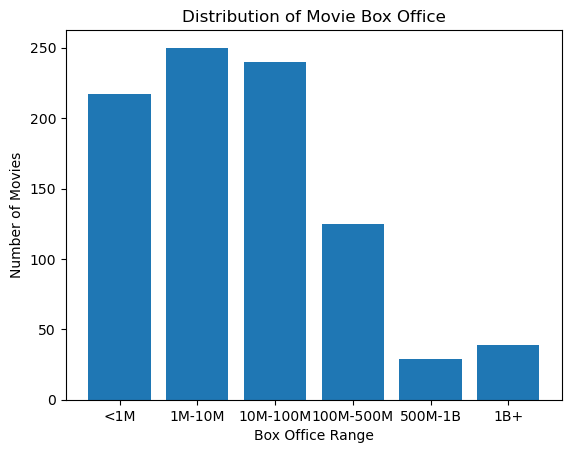

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 定义票房范围
bins = [0, 1000000, 10000000, 100000000, 500000000, 1000000000, float('inf')]

# 使用cut函数进行离散化，并计算每个区间内的数量
categories = pd.cut(data['box_office'], bins=bins, labels=['<1M', '1M-10M', '10M-100M', '100M-500M', '500M-1B', '1B+'])
count_per_category = categories.value_counts().sort_index()

# 绘制分布图
plt.bar(count_per_category.index, count_per_category.values)
plt.title('Distribution of Movie Box Office')
plt.xlabel('Box Office Range')
plt.ylabel('Number of Movies')
plt.show()


# 聚类（该分类方法效果不佳）

In [10]:
import pandas as pd
import numpy as np


# 定义票房范围和对应的标签
bins = [0, 1000000, 10000000, 50000000,100000000, 500000000, 1000000000, float('inf')]
labels = [1, 2, 3, 4, 5, 6,7]

# 使用cut函数进行分组，并映射标签
data['box_office_category'] = pd.cut(data['box_office'], bins=bins, labels=labels, include_lowest=True)

# 打印结果
print(data.head())
data.to_csv('//Users//changliu//Desktop//movie_data_with_categories.csv', index=False)


           box_office  cluster box_office_category
豆瓣评价人数                                            
1800000  5.036000e+09        4                   7
1700000  4.790000e+08        0                   5
170781   9.181000e+07        0                   4
639625   2.093000e+07        0                   3
15627    5.844000e+07        0                   4


/Users/changliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/changliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/changliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/changliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

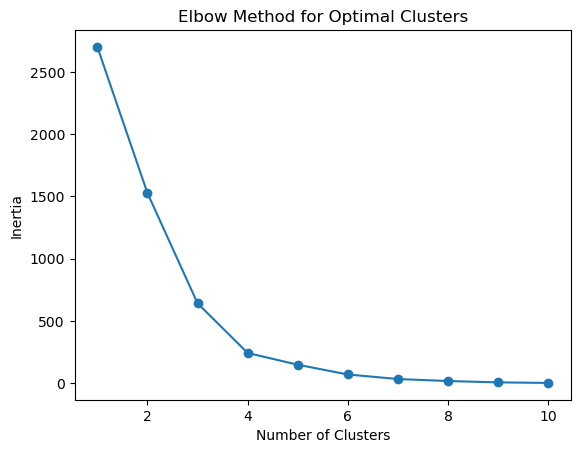

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# 将数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 计算不同簇数下的惯性
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/Users/changliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


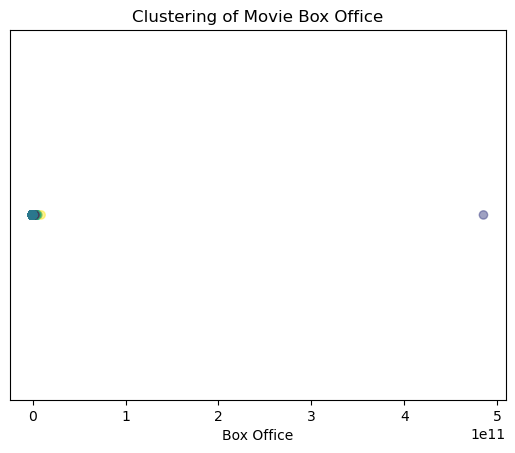

/Users/changliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


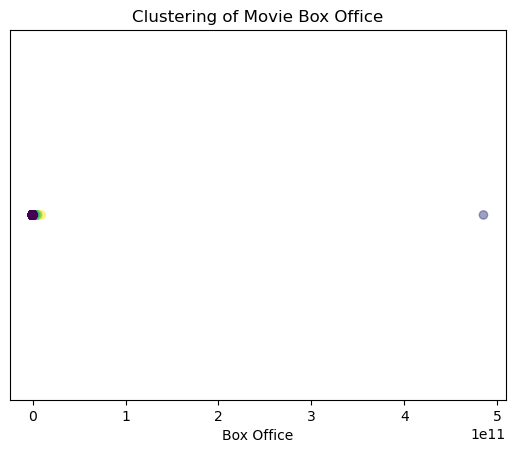

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 将数据标准化，确保各个特征具有相同的尺度
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 使用 K 均值聚类
num_clusters = 6  # 你可以根据需要调整聚类的数量
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# 绘制分布图
plt.scatter(data['box_office'], np.zeros_like(data['box_office']), c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Movie Box Office')
plt.xlabel('Box Office')
plt.yticks([])  # 隐藏y轴
plt.show()
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 将数据标准化，确保各个特征具有相同的尺度
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 使用 K 均值聚类
num_clusters = 6  # 你可以根据需要调整聚类的数量
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# 绘制分布图
plt.scatter(data['box_office'], np.zeros_like(data['box_office']), c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Movie Box Office')
plt.xlabel('Box Office')
plt.yticks([])  # 隐藏y轴
plt.show()
